In [3]:
!pip install pandas_datareader
!pip install yfinance
!pip install matplotlib

  Using cached yfinance-0.1.72-py2.py3-none-any.whl (27 kB)
  Using cached multitasking-0.0.10-py3-none-any.whl
     ---------------------------------------- 7.2/7.2 MB 8.7 MB/s eta 0:00:00
     ------------------------------------- 930.9/930.9 kB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00


In [8]:
import yfinance as yf
data = yf.download('AAPL', '2019-08-01','2020-08-01')
ts = data['Open']
print(ts.head())

[*********************100%***********************]  1 of 1 completed
Date
2019-08-01    53.474998
2019-08-02    51.382500
2019-08-05    49.497501
2019-08-06    49.077499
2019-08-07    48.852501
Name: Open, dtype: float64


[*********************100%***********************]  1 of 1 completed


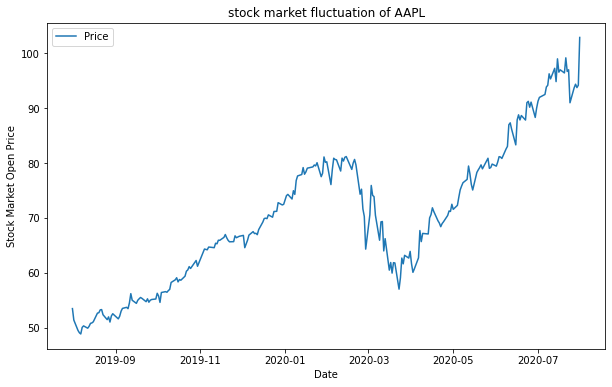

In [9]:
#1. matplotlib.pyplot api
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download('AAPL', '2019-08-01','2020-08-01')
ts = data['Open']
plt.figure(figsize=(10,6)) #그래프 크기
plt.plot(ts)
plt.legend(labels=['Price'], loc='best') #범례
plt.title('stock market fluctuation of AAPL')
plt.xlabel('Date')
plt.ylabel('Stock Market Open Price')
plt.show()

In [5]:
#2. 객체 지향 API
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()

import numpy as np
np.random.seed(6)

x = np.random.randn(20000)
ax = fig.add_subplot(111)
ax.hist(x,100)
ax.set_title('Artist layer histogram')
fig.savefig('Matplotlib_histogram.png')

[*********************100%***********************]  1 of 1 completed


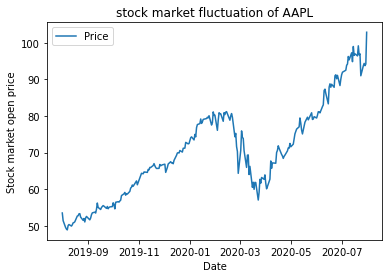

In [10]:
#3. pyplot api, 객체 지향 api
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download('AAPL', '2019-08-01','2020-08-01')
ts = data['Open']

fig = plt.figure()
ax = fig.subplots() #fig, ax=plt.subplots()

ax.plot(ts)
ax.set_title('stock market fluctuation of AAPL')
ax.legend(labels=['Price'],loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('Stock market open price')
plt.show()

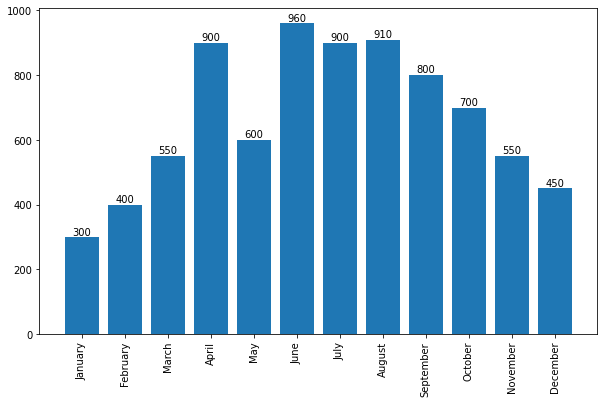

In [5]:
# Bar Plot

import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [x for x in range(1,13)]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

fig, ax = plt.subplots(figsize=(10,6)) #객체 지향으로 그래프 작성하기 위해 fig, ax 선언
plt.xticks(month_list, calendar.month_name[1:13], rotation=90)
plot = ax.bar(month_list, sold_list)

#각 그래프에 숫자 추가하기

for rect in plot:
    height = rect.get_height()
    #ax.text(): 그래프에 주석 추가
    ax.text(rect.get_x()+rect.get_width()/2., 1.002*height, '%d'%int(height), ha='center', va='bottom')

plt.show()

In [7]:
!pip install seaborn

     -------------------------------------- 292.8/292.8 kB 6.0 MB/s eta 0:00:00


C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_19964/3063287251.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


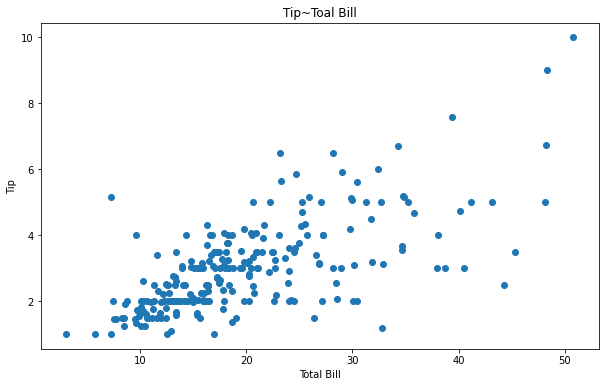

In [9]:
#산점도 그래프: 두 수치형 변수의 분포와 상관관계 확인
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
x = tips['total_bill']
y = tips['tip']

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Tip~Toal Bill')

fig.show()

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_19964/311271706.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


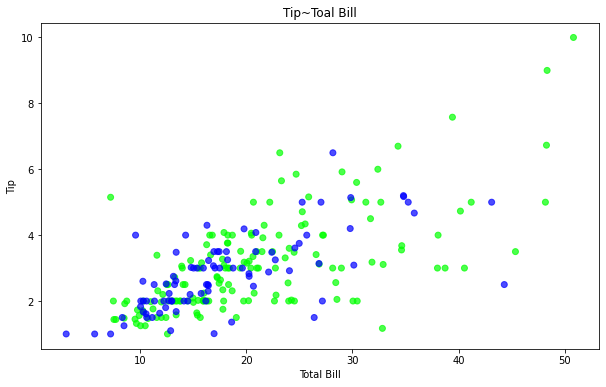

In [12]:
#산점도 그래프 보완
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
x = tips['total_bill']
y = tips['tip']

tips['sex_color'] = tips['sex'].map({"Female":"#0000FF", "Male":"#00FF00"}) #map 함수 이용해 sex 별로 다른 색 삽입

fig, ax = plt.subplots(figsize=(10,6))

for label, data in tips.groupby('sex'): #sex에 따라 두 그룹으로 만들기
    ax.scatter(data['total_bill'], data['tip'],label=label,color=data['sex_color'],alpha=0.7)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Tip~Toal Bill')

fig.show()

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_19964/1330405547.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


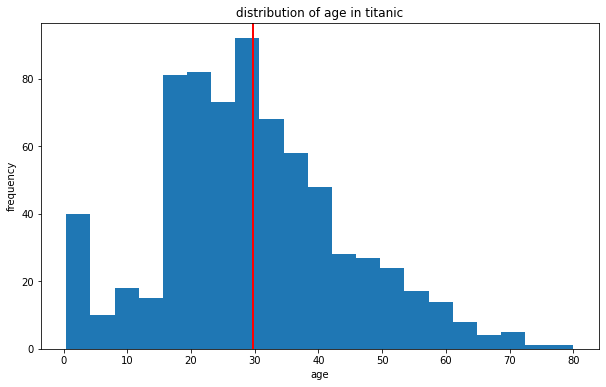

In [17]:
#히스토그램: 연속형 변수의 분포
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

titanic = sns.load_dataset('titanic')
age = titanic['age']

nbins = 21

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(age, bins=nbins)
ax.set_xlabel("age")
ax.set_ylabel("frequency")
ax.set_title("distribution of age in titanic")
ax.axvline(x=age.mean(), linewidth=2, color='r') #데이터 평균선 표현
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27be34d1220>,
 'caps': [<matplotlib.lines.Line2D at 0x27be34d17c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27be14b2f10>,
 'medians': [<matplotlib.lines.Line2D at 0x27be34d1d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x27be34e0070>,
 'means': []}

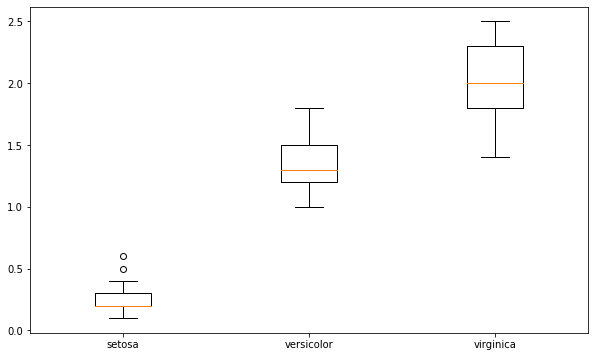

In [1]:
#Box Plot: 범주형 데이터를 기준으로 수치형 데이터의 분포 파악. 최솟값, 1분위값, 중간값, 3분위값, 최댓값 제공
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')

data = [iris[iris['species']=='setosa']['petal_width'],\
    iris[iris['species']=='versicolor']['petal_width'],\
        iris[iris['species']=='virginica']['petal_width']]


fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(data, labels=['setosa','versicolor','virginica'])

C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_18000/2295727313.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(flights.columns, rotation=20)
C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_18000/2295727313.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(flights.index, rotation=10)
C:\Users\HONGSE~1\AppData\Local\Temp/ipykernel_18000/2295727313.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


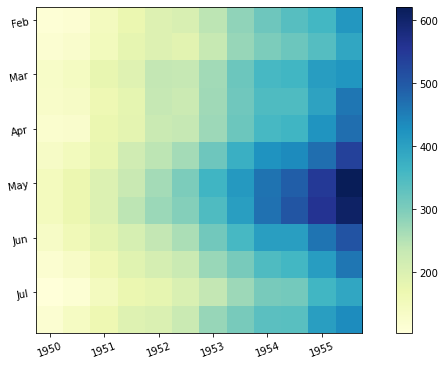

In [3]:
#heat map
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flights = sns.load_dataset('flights')
flights = flights.pivot("month","year","passengers")

fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(flights, cmap='YlGnBu')
ax.set_xticklabels(flights.columns, rotation=20)
ax.set_yticklabels(flights.index, rotation=10)
fig.colorbar(im)

fig.show()

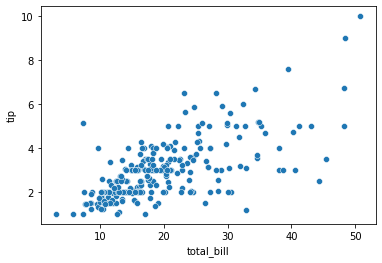

In [4]:
#seaborn library: matplotlib와 다르게 별도의 가공 없이 x,y축 입력만으로도 매우 쉽게 시각화 가능
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

sns.scatterplot(x='total_bill', y="tip", data=tips)
plt.show()